<title>
Bioinformatics Research Group Rotation Report | Michał Kowalski |
MCB PhD School
</title>

# Scope
Get familiar with R tools for RNA-Seq analysis

# Topics
## Bioconductor
Bioconductor is an R libraries repository created directly for Bioinformatic purposes. Many packages and libraries are sharing common core based on the CRAN packages, nevertheless <code>BiocManager</code> handles instalation guidelines from both repositories which makes it user friendly

## Rsubread
Rsubread is a too for subread sequence alignment and counting for R programming language. It allows alignment, quantification and analysis of second and third generation sequencing data. With Rsubread one can map, SNP call and even detect structural variants.

In [1]:
setwd("data") #setting working directory to "data"

In [2]:
BiocManager::install("Rsubread") #instaling Rsubread library with BiocManager within its namespace

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'Rsubread'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'backports', 'boot', 'broom', 'callr', 'caret', 'class', 'cli',
  'dbplyr', 'digest', 'dplyr', 'ellipsis', 'forcats', 'foreach', 'fs',
  'ggplot2', 'glmnet', 'glue', 'haven', 'hexbin', 'httpuv', 'jsonlite',
  'KernSmooth', 'knitr', 'lattice', 'lava', 'lifecycle', 'lubridate', 'MASS',
  'mime', 'ModelMetrics', 'modelr', 'nlme', 'nnet', 'pillar', 'plyr',
  'prettyunits', 'pROC', 'processx', 'ps', 'purrr', 'quantmod', 'rbokeh',
  'Rcpp', 'recipes', 'repr', 'reshape2', 'rlang', 'rmarkdown', 'rstudioapi',
  'scales', 'shiny', 'spatial', 'SQUAREM', 'stringi', 'survival', 'tibble',
  'tidyr', 'tidyselect', 'tinytex', 'uuid', 'vctrs', 'withr', 'xfun', 'xml2',
  'yaml', 'zoo'



In [3]:
library(Rsubread) #loading Rsubread library package
buildindex(basename = "ref_index", reference = "TAIR9.fa", indexSplit = T, memory = 8000) #building index for subreads based on reference TAIR9 Arabidopsis thaliana



        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
       Rsubread 2.0.1

//================================= setting ==================================\\
||                                                                            ||
||                Index name : ref_index                                      ||
||               Index space : base space                                     ||
||                    Memory : 8000 Mbytes                                    ||
||          Repeat threshold : 100 repeats                                    ||
||              Gapped index : no                    

In [4]:
subjunc(index = "ref_index", readfile1 = "OE_1_R1.fastq",
        output_file = "OE_1_R1.bam", nthreads = 4,
        sortReadsByCoordinates = T, input_format = "FASTQ") #Read alginment and junction detection for sample with overexpression


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
       Rsubread 2.0.1

//================================= setting ==================================\\
||                                                                            ||
|| Function      : Read alignment + Junction detection (RNA-Seq)              ||
|| Input file    : OE_1_R1.fastq                                              ||
|| Output file   : OE_1_R1.bam (BAM), Sorted                                  ||
|| Index name    : ref_index                                                  ||
||                                                   

,OE.1.R1.bam
,<int>
Total_reads,5025600
Mapped_reads,4095123
Uniquely_mapped_reads,4021944
Multi_mapping_reads,73179
Unmapped_reads,930477
Junctions,91527
Indels,18655


In [5]:
subjunc(index = "ref_index", readfile1 = "WT_R1.fastq",
        output_file = "WT_R1.bam", nthreads = 4,
        sortReadsByCoordinates = T, input_format = "FASTQ") #Read alginment and junction detection for wild type sample


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
       Rsubread 2.0.1

//================================= setting ==================================\\
||                                                                            ||
|| Function      : Read alignment + Junction detection (RNA-Seq)              ||
|| Input file    : WT_R1.fastq                                                ||
|| Output file   : WT_R1.bam (BAM), Sorted                                    ||
|| Index name    : ref_index                                                  ||
||                                                   

,WT.R1.bam
,<int>
Total_reads,10000000
Mapped_reads,8230118
Uniquely_mapped_reads,8048204
Multi_mapping_reads,181914
Unmapped_reads,1769882
Junctions,97463
Indels,27591


In [6]:
fc <- featureCounts(files = c("OE_1_R1.bam", "WT_R1.bam"),
                    annot.ext = "TAIR9.gtf", isGTFAnnotationFile = T,
                    nthreads = 4) #Counting of transcripts (features) with the given annotation for both samples


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
       Rsubread 2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 2 BAM files                                      ||
||                           o OE_1_R1.bam                                    ||
||                           o WT_R1.bam                                      ||
||                                                                            ||
||              Annotation : TAIR9.gtf (GTF)         

## Comparison of features
To have a better insight what is truly overexpressed one should conduct a gene ontology analysis or set the expression threshold for the "real world" studies.
During this course we were focused on "perfect world" example with which we know exactly which gene is our gene of interest.
Every single analysis should be started with EDA (Exploratory Data Analysis) to get familiar with the nature of the data, so it was also conducted.

In [7]:
print(class(fc)) #printing out class of data
print(typeof(fc)) #printing out type of data
print(str(fc)) #printing out structure of data

[1] "list"
[1] "list"
List of 4
 $ counts    : int [1:23905, 1:2] 36 72 33 196 301 1138 28 296 1127 658 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:23905] "AT1G01010" "AT1G01020" "AT1G01030" "AT1G01040" ...
  .. ..$ : chr [1:2] "OE.1.R1.bam" "WT.R1.bam"
 $ annotation:'data.frame':	23905 obs. of  6 variables:
  ..$ GeneID: chr [1:23905] "AT1G01010" "AT1G01020" "AT1G01030" "AT1G01040" ...
  ..$ Chr   : chr [1:23905] "Chr1;Chr1;Chr1;Chr1;Chr1;Chr1" "Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;C"| __truncated__ "Chr1;Chr1;Chr1" "Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1;Chr1" ...
  ..$ Start : chr [1:23905] "3631;3996;4486;4706;5174;5439" "6798;6798;6798;6798;6798;6798;6798;7157;7157;7157;7157;7157;7157;7157;7384;7384;7384;7384;7384;7384;7384;7564;7"| __truncated__ "11676;11676;13335" "23857;24542;24640;24752;25041;25627;25825;26081;26292;26543;26862;27268;27372;2

In [8]:
head(fc$stat,5) #looking at 5 first records of "stat" element of list, of class "data.frame"

,Status,OE.1.R1.bam,WT.R1.bam
,<chr>,<int>,<int>
1,Assigned,3908672,7838914
2,Unassigned_Unmapped,930477,1769882
3,Unassigned_Read_Type,0,0
4,Unassigned_Singleton,0,0
5,Unassigned_MappingQuality,0,0


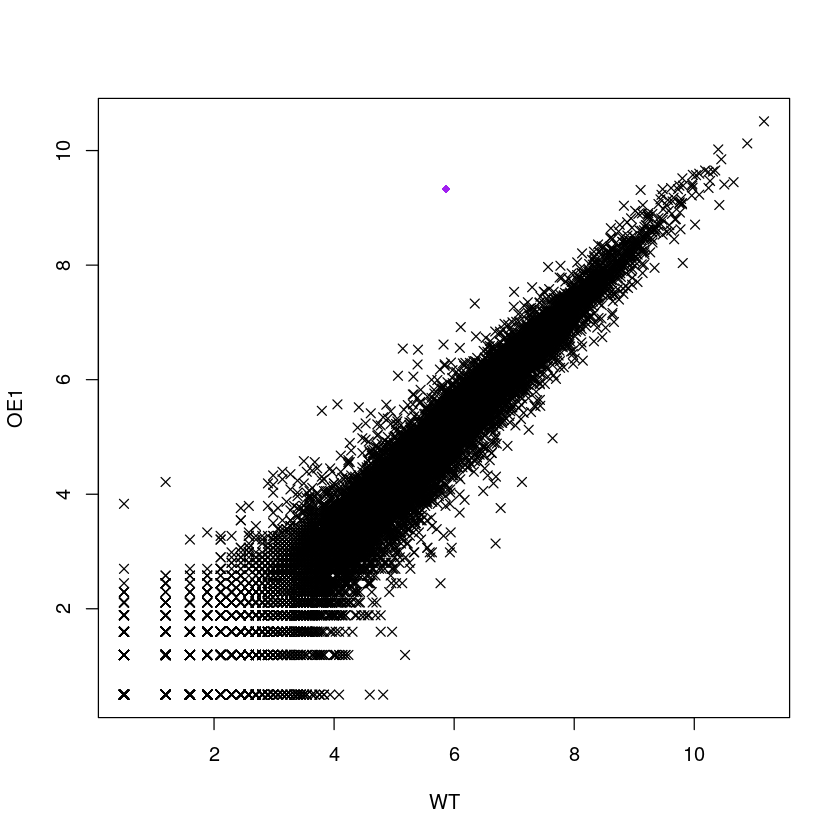

In [9]:
counts <- as.data.frame(fc$counts) #converting count matrix to dataframe
colnames(counts) <- c("OE1", "WT") #setting column names to more reliable ones
pchs <- rep(4, dim(counts)[1]) #setting cross as point character for plotting for all features
cols <- rep("black", dim(counts)[1]) #setting black as a color for all features
names(pchs) <- names(cols) <- rownames(counts) #setting names of variables inside vectors to feature names
sel.gene <- "AT3G01150" #setting selected gene of interest as a variable to invoke
pchs[sel.gene] <- 18 #setting filled circle as point character of gene of interest
cols[sel.gene] <- "purple" #setting red as the fill of point character of gene of interest
plot(x = log(counts$WT) + 0.5, y = log(counts$OE1) + 0.5,
     xlab = "WT", ylab = "OE1", col = cols, pch = pchs) #plotting the comparison with 0.5 offset


## Transcript expression inference and differential expression analysis for RNA-seq data
Next part of the analysis would be to analyse feature counts for the estimation of expression. Steps shown above can be either performed with Rsubread or with bowtie - as the state of the art algorithm for such purpose. Estimated expression for feature counts were prepared by the lecturer with 2 duplicates.

In [52]:
OE1_1 <- read.table(file = "OE_1_R1.counts") #reading table with counts for sample with overexpression
WT_1 <- read.table(file = "WT_R1.counts") #reading table with counts for wild type sample
OE1_2 <- read.table(file = "OE_1_R2.counts")
WT_2 <- read.table(file = "WT_R2.counts")
TR <- read.table(file = "TAIR9.tr") #reading table for mapping of counts

In [53]:
OE_1_1_exp <- apply(as.matrix(OE1_1),1,mean) #extracting mean expression from reads for sample with overexpression
WT_1_exp <- apply(as.matrix(WT_1),1,mean) #extracting mean expression from read for wild type sample
OE_1_2_exp <- apply(as.matrix(OE1_2),1,mean) #extracting mean expression from reads for sample with overexpression R2
WT_2_exp <- apply(as.matrix(WT_2),1,mean) #extracting mean expression from read for wild type sample R2

In [54]:
transcript_names <- unique(as.character(TR$V2)) #extracting unique transcript names

In [56]:
names(OE_1_1_exp) <- names(WT_1_exp) <- names(OE_1_2_exp) <- names(WT_2_exp) <- transcript_names #mapping of counts to transcripts

In [57]:
transcripts <- cbind(OE_1_1_exp, WT_1_exp, OE_1_2_exp, WT_2_exp) #creating merged transctipts matrix

In [58]:
head(transcripts)

,OE_1_1_exp,WT_1_exp,OE_1_2_exp,WT_2_exp
AT1G01010_ID1,83.673351,142.173100,85.17584,107.61582
AT1G01020_ID8,8.750743,21.360060,18.41270,20.55019
AT1G01020_ID9,37.910036,22.675898,21.36570,33.39722
AT1G01020_ID4,9.650110,8.363400,14.02244,15.10687
AT1G01020_ID5,11.817266,8.250928,14.21590,17.22066
AT1G01020_ID6,8.541985,9.877057,16.20686,9.85386


## Differential expression analysis

In [44]:
BiocManager::install("limma")
BiocManager::install("edgeR")
BiocManager::install("DESeq2")

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'limma'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'backports', 'boot', 'broom', 'callr', 'caret', 'class', 'cli',
  'dbplyr', 'digest', 'dplyr', 'ellipsis', 'forcats', 'foreach', 'fs',
  'ggplot2', 'glmnet', 'glue', 'haven', 'hexbin', 'httpuv', 'jsonlite',
  'KernSmooth', 'knitr', 'lattice', 'lava', 'lifecycle', 'lubridate', 'MASS',
  'mime', 'ModelMetrics', 'modelr', 'nlme', 'nnet', 'pillar', 'plyr',
  'prettyunits', 'pROC', 'processx', 'ps', 'purrr', 'quantmod', 'rbokeh',
  'Rcpp', 'recipes', 'repr', 'reshape2', 'rlang', 'rmarkdown', 'rstudioapi',
  'scales', 'shiny', 'spatial', 'SQUAREM', 'stringi', 'survival', 'tibble',
  'tidyr', 'tidyselect', 'tinytex', 'uuid', 'vctrs', 'withr', 'xfun', 'xml2',
  'yaml', 'zoo'

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'edgeR'

also installing the depe

In [45]:
library(limma)
library(edgeR)
library(DESeq2)

Loading required package: SummarizedExperiment

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: DelayedArray

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following objects are masked from ‘package:Biobase’:

    anyMissing, rowMedians


Loading required package: BiocParallel


Attaching package: ‘DelayedArray’


The following objects are masked from ‘package:matrixStats’:

    colMaxs, colMins, colRanges, rowMaxs, rowMins, rowRanges


The following objects are masked from ‘package:base’:

    aperm, apply, rowsum




### [limma](http://bioconductor.org/packages/release/bioc/html/limma.html)

In [59]:
samples <- substr(colnames(transcripts),0,2)

In [60]:
design <- data.frame(OEs = ifelse(samples == "OE",1,0),
                     WTs = ifelse(samples == "WT",1,0))
rownames(design) <- colnames(transcripts)
cm <- makeContrasts(OEvsWT = OEs - WTs,
                    levels = design)
dge <- DGEList(counts = transcripts)
dge <- calcNormFactors(dge)
summary(dge$counts)

   OE_1_1_exp          WT_1_exp          OE_1_2_exp          WT_2_exp       
 Min.   :    1.06   Min.   :    0.95   Min.   :    1.43   Min.   :    1.27  
 1st Qu.:    8.11   1st Qu.:    8.87   1st Qu.:    8.39   1st Qu.:    8.21  
 Median :   24.34   Median :   26.44   Median :   24.66   Median :   24.17  
 Mean   :  137.76   Mean   :  135.83   Mean   :  131.28   Mean   :  138.85  
 3rd Qu.:   86.75   3rd Qu.:   90.98   3rd Qu.:   84.45   3rd Qu.:   83.96  
 Max.   :38655.88   Max.   :37868.56   Max.   :33305.85   Max.   :41504.22  

In [61]:
v <- voom(dge, design, plot = F)

In [62]:
summary(v$E)

   OE_1_1_exp         WT_1_exp         OE_1_2_exp         WT_2_exp     
 Min.   :-2.3212   Min.   :-2.4642   Min.   :-2.0085   Min.   :-2.117  
 1st Qu.: 0.1428   1st Qu.: 0.2303   1st Qu.: 0.1959   1st Qu.: 0.185  
 Median : 1.6712   Median : 1.7548   Median : 1.6961   Median : 1.687  
 Mean   : 1.8811   Mean   : 1.9159   Mean   : 1.9029   Mean   : 1.901  
 3rd Qu.: 3.4838   3rd Qu.: 3.5184   3rd Qu.: 3.4516   3rd Qu.: 3.462  
 Max.   :12.2751   Max.   :12.2117   Max.   :12.0665   Max.   :12.403  

In [63]:
fit <- lmFit(v, design)
cf <- contrasts.fit(fit, cm)
fe <- eBayes(cf, proportion = 0.01)
limma.transcripts <- topTable(fe, number = Inf, adjust.method="BH", sort.by="none")
head(limma.transcripts)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AT1G01010_ID1,-0.54242855,3.7185140,-1.15124132,0.2802747,0.9999965,-4.587600
AT1G01020_ID8,-0.69001983,1.1104461,-1.21252523,0.2571939,0.9999965,-4.585733
AT1G01020_ID9,0.05506893,1.8691504,0.09441678,0.9269158,0.9999965,-4.618065
AT1G01020_ID4,0.05099166,0.6151374,0.09345027,0.9276615,0.9999965,-4.622177
AT1G01020_ID5,0.11709142,0.7309135,0.20895226,0.8392935,0.9999965,-4.620637
AT1G01020_ID6,0.25316511,0.5328437,0.47884883,0.6438458,0.9999965,-4.616095


### [edgeR](http://bioconductor.org/packages/release/bioc/html/edgeR.html)

In [64]:
design <- data.frame(OEs = ifelse(samples == "OE",1,0),
                     WTs = ifelse(samples == "WT",1,0))
rownames(design) <- colnames(transcripts)
cm <- makeContrasts(OEvsWT = OEs - WTs,
                    levels = design)
dge <- DGEList(counts = transcripts)
dge <- calcNormFactors(dge)
dge <- estimateDisp(dge, design)

In [103]:
fit <- glmQLFit(dge, design)
lrt <- glmLRT(fit)
qlf <- glmQLFTest(fit, contrast = cm)
edgeR.transcripts <- qlf$table
head(edgeR.transcripts)

,logFC,logCPM,F,PValue
,<dbl>,<dbl>,<dbl>,<dbl>
AT1G01010_ID1,-0.55334226,3.7703673,1.4092008877,0.2647369
AT1G01020_ID8,-0.61280150,1.3040119,1.0605246455,0.3292320
AT1G01020_ID9,0.08143861,1.9847612,0.0175592943,0.8974135
AT1G01020_ID4,0.01525804,0.8239765,0.0007733389,0.9784044
AT1G01020_ID5,0.03259894,0.9343888,0.0032855063,0.9555082
AT1G01020_ID6,0.33097143,0.7504684,0.3868442605,0.5489626


### [DESeq2](http://bioconductor.org/packages/release/bioc/html/DESeq2.html)

In [78]:
coldata <- data.frame(condition = samples, type = rep('single-end', 4))
# gene_names <- unique(substr(rownames(transcripts),0,9))
# gene_names 
rownames(coldata) <- colnames(transcripts)
design <- data.frame(OEs = ifelse(samples == "OE",1,0),
                     WTs = ifelse(samples == "WT",1,0))
transcripts_int <- apply(transcripts, 2, as.integer)
rownames(transcripts_int) <- rownames(transcripts)
head(transcripts_int)


,OE_1_1_exp,WT_1_exp,OE_1_2_exp,WT_2_exp
AT1G01010_ID1,83,142,85,107
AT1G01020_ID8,8,21,18,20
AT1G01020_ID9,37,22,21,33
AT1G01020_ID4,9,8,14,15
AT1G01020_ID5,11,8,14,17
AT1G01020_ID6,8,9,16,9


In [79]:
rownames(design) <- colnames(transcripts)
dds <- DESeqDataSetFromMatrix(transcripts_int, coldata, ~condition)
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [82]:
resultsNames(dds)

[1] "Intercept"          "condition_WT_vs_OE"

In [84]:
DESeq.transcripts <- as.data.frame(results(dds))
head(DESeq.transcripts)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AT1G01010_ID1,104.25427,0.56796018,0.5771377,0.98409824,0.3250672,0.9999955
AT1G01020_ID8,16.77428,0.66054878,0.8070173,0.81850634,0.4130681,NA
AT1G01020_ID9,28.34368,-0.06774036,0.7154248,-0.09468551,0.9245646,NA
AT1G01020_ID4,11.55106,0.01066066,0.8890819,0.01199064,0.9904331,NA
AT1G01020_ID5,12.56238,0.01197466,0.8696280,0.01376986,0.9890136,NA
AT1G01020_ID6,10.51284,-0.41107809,0.9111996,-0.45113946,0.6518890,NA


## Visualization of results - Volcano plots

In [98]:
pchs <- rep(4, dim(TR)[1])
cols <- rep("black", dim(TR)[1])
names(pchs) <- names(cols) <- as.character(TR$V2)
sel.trans <- as.character(TR[which(substr(TR$V2,0,9) == sel.gene),2])
pchs[sel.trans] <- 18
cols[sel.trans] <- "purple"

### limma

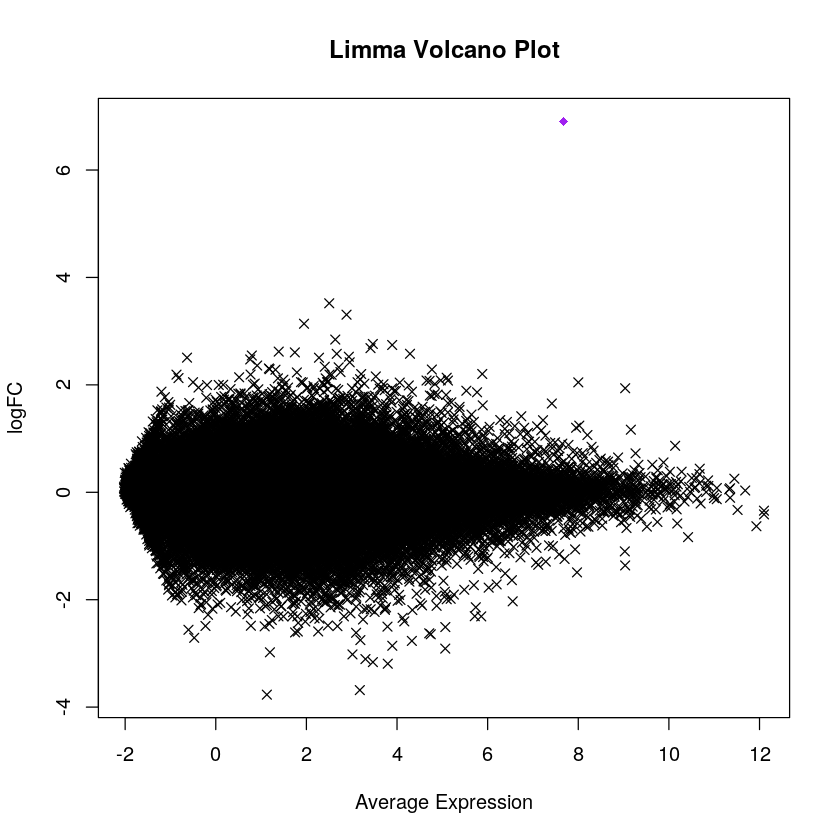

In [99]:
plot(x = limma.transcripts$AveExpr, y = limma.transcripts$logFC,
     xlab = "Average Expression", ylab = "logFC", main = "Limma Volcano Plot",
     pch = pchs, col = cols)

### edgeR

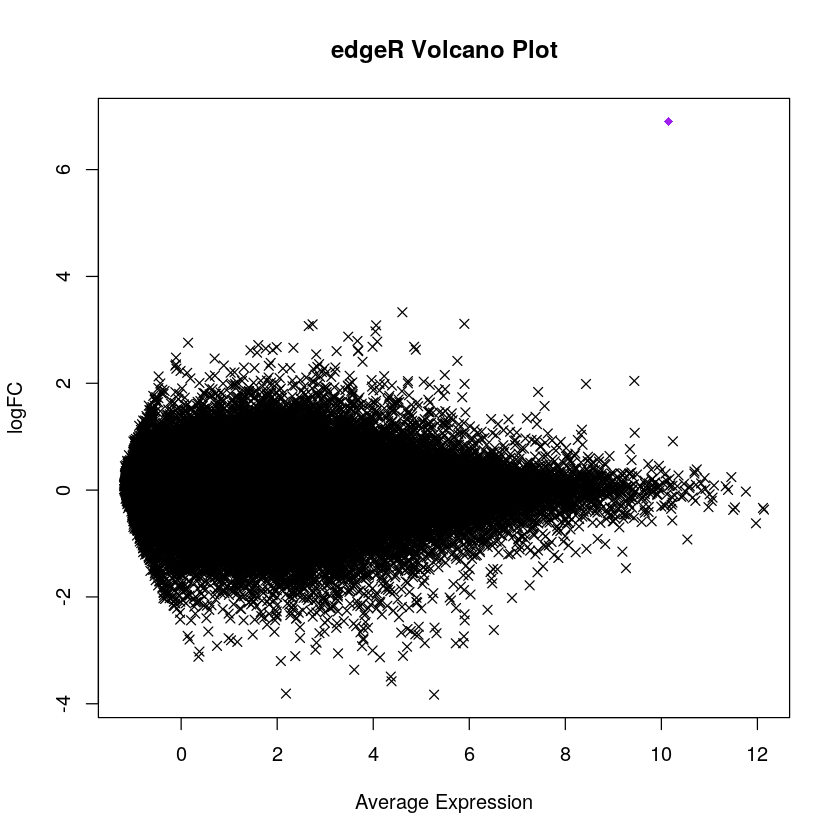

In [104]:
plot(x = edgeR.transcripts$logCPM, y = edgeR.transcripts$logFC,
     xlab = "Average Expression", ylab = "logFC", main = "edgeR Volcano Plot",
     pch = pchs, col = cols)

### DESeq2

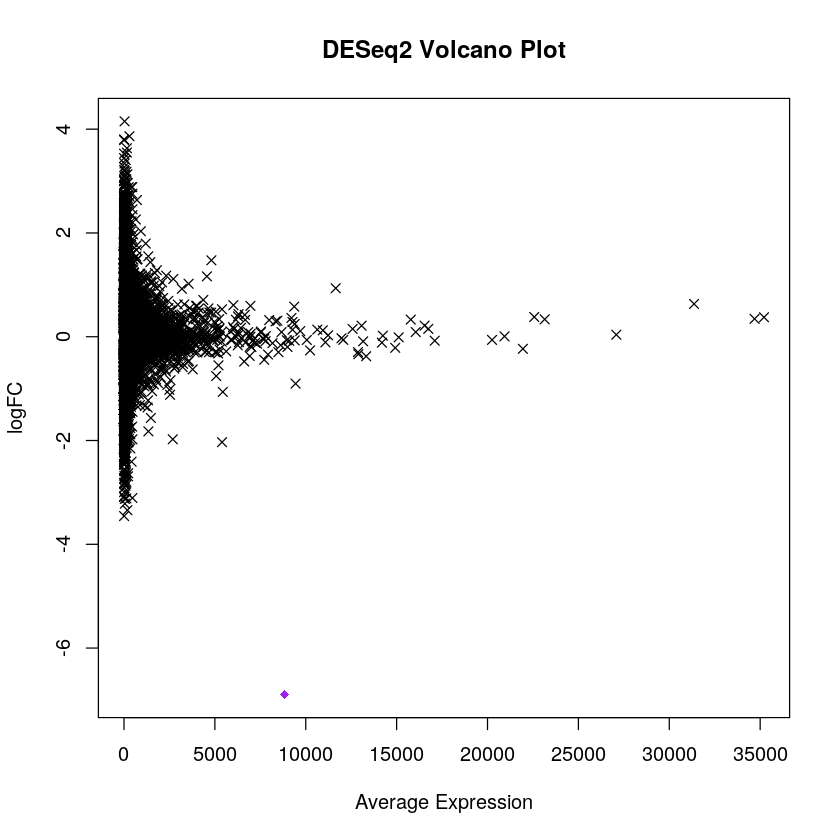

In [105]:
plot(x = DESeq.transcripts$baseMean, y = DESeq.transcripts$log2FoldChange,
     xlab = "Average Expression", ylab = "logFC", main = "DESeq2 Volcano Plot",
     pch = pchs, col = cols)

# Conclusions
Easiest way to perform analysis was provided by limma. DESeq2 is considered a state of the art algorithm.
Limma and edgeR gave very simmilar results to each other and DESeq had reversed (negative) distribution of expression logarithmic fold change.
It had also redistributed outliers to underline the real expression changes